In [12]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [13]:
import numpy as np

In [14]:
from IPython.display import Image
from graphviz import Digraph

In [15]:
#CREATE BINARY SEARCH TREE

class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None
        self.parent = None
        self.height = 1
        self.balance = 0

def get_height(node):
    if not node:
        return 0
    return node.height

def update_height(node):
    if not node:
        return
    node.height = 1 + max(get_height(node.left), get_height(node.right))
        
def get_balance(node):
    if not node:
        return 0
    return node.balance  

def update_balance(node):
    if not node:
        return 
    node.balance = get_height(node.left) - get_height(node.right)


    
def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    root = binaryTree(nodes, 0, len(nodes) - 1)
    update_tree(root)
    return root
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    return root

def update_tree(node):
    if not node:
        return
    update_tree(node.left)
    update_tree(node.right)
    update_height(node)
    update_balance(node)
    
def left_rotate(root, p):
    q = p.right
    p.right = q.left
    if q.left:
        q.left.parent = p
    q.parent = p.parent
    if not p.parent:
        root = q
    elif p == p.parent.left:
        p.parent.left = q
    else:
        p.parent.right = q
    q.left = p
    p.parent = q
    update_height(p)
    update_height(q)
    update_balance(p)
    update_balance(q)
    return q  # Return new root of the subtree

def right_rotate(root, p):
    q = p.left
    p.left = q.right
    if q.right:
        q.right.parent = p
    q.parent = p.parent
    if not p.parent:
        root = q
    elif p == p.parent.left:
        p.parent.left = q
    else:
        p.parent.right = q
    q.right = p
    p.parent = q
    update_height(p)
    update_height(q)
    update_balance(p)
    update_balance(q)
    return q  # Return new root of the subtree

def left_right_rotate(root, p):
    root = left_rotate(root, p.left)
    return right_rotate(root, p)

def right_left_rotate(root, p):
    root = right_rotate(root, p.right)
    return left_rotate(root, p)

In [16]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            label = f'{tree.val}\nBal: {tree.balance}'
            dot.node(name=str(tree), label=label)

        # Add nodes
        if tree.left:
            label = f'{tree.left.val}\nBal: {tree.left.balance}'
            dot.node(name=str(tree.left), label=label)
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            label = f'{tree.right.val}\nBal: {tree.right.balance}'
            dot.node(name=str(tree.right), label=label)
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

def is_balanced(node):
    if not node:
        return True
    
    balance = get_balance(node)
    if balance > 1 or balance < -1:
        return False
    
    return is_balanced(node.left) and is_balanced(node.right)




In [17]:
def insert(root, val):
    if root is None:
        return Node(val)

    if val < root.val:
        root.left = insert(root.left, val)
        root.left.parent = root
    else:
        root.right = insert(root.right, val)
        root.right.parent = root

    update_height(root)
    update_balance(root)

    # Perform rotations to balance the tree
    balance = get_balance(root)

    # Left Left Case
    if balance > 1 and val < root.left.val:
        return right_rotate(root, root)

    # Right Right Case
    if balance < -1 and val > root.right.val:
        return left_rotate(root, root)

    # Left Right Case
    if balance > 1 and val > root.left.val:
        root.left = left_rotate(root, root.left)
        return right_rotate(root, root)

    # Right Left Case
    if balance < -1 and val < root.right.val:
        root.right = right_rotate(root, root.right)
        return left_rotate(root, root)

    return root

In [18]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        #if nodes.left:
        nodes.left = delete(nodes.left, val)
    elif val > nodes.val:
        #if nodes.right:
        nodes.right = delete(nodes.right, val)
    else:
        # Node with only one child or no child
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        nodes.val = temp.val
        nodes.right = delete(nodes.right, temp.val)
        
    update_height(nodes)
    update_balance(nodes)
        
    return nodes

In [19]:
def find_node(root, value):
 if root is None or root.val == value:
     return root
 if value < root.val:
     return find_node(root.left, value)
 else:
     return find_node(root.right, value)

def find_first_common_ancestor(root, val1, val2):
 node1 = find_node(root, val1)
 node2 = find_node(root, val2)
 if not node1 or not node2:
     return None
 
 while root:
     if val1 < root.val and val2 < root.val:
         root = root.left
     elif val1 > root.val and val2 > root.val:
         root = root.right
     else:
         return root
 return None

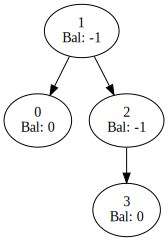

Is the tree balanced? True


In [23]:
test1 = [0, 1, 2, 3]
test1_tree = buildBinaryTree(test1)

visualize_tree(test1_tree)
print(f'Is the tree balanced? {is_balanced(test1_tree)}')


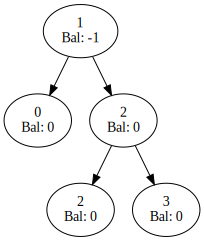

Is the tree balanced? True


In [24]:
insert(test1_tree, 2)
#insert(test1_tree, 1)
#insert(test1_tree, 12)
#insert(test1_tree, 5)
#insert(test1_tree, 9)
#insert(test1_tree, 10)
#insert(test1_tree, 3)
#insert(test1_tree, 6)
#insert(test1_tree, 7)
#insert(test1_tree, 4)
dot = visualize_tree(test1_tree)
print(f'Is the tree balanced? {is_balanced(test1_tree)}')

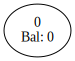

Is the tree balanced? True


In [22]:
insert(test1_tree, 50)
dot = visualize_tree(test1_tree)
print(f'Is the tree balanced? {is_balanced(test1_tree)}')

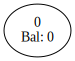

Is the tree balanced? True


In [29]:
delete(test1_tree, 1)
delete(test1_tree, 2)
dot = visualize_tree(test1_tree)
print(f'Is the tree balanced? {is_balanced(test1_tree)}')

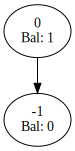

Is the tree balanced? True


In [30]:
insert(test1_tree, -1)
dot = visualize_tree(test1_tree)
print(f'Is the tree balanced? {is_balanced(test1_tree)}')

In [31]:
bst = buildBinaryTree(test1)

# Input specific values
val1 = 5
val2 = 7

ancestor = find_first_common_ancestor(bst, val1, val2)
print("First Common Ancestor:", ancestor.val if ancestor else "None")

First Common Ancestor: None
